DATASET GOOGLE PLAY STORE

https://www.kaggle.com/datasets/lava18/google-play-store-apps

-PREDECIR LA CANT DE INSTALACIONES

SIN LAS COLUMNAS: Genres, Last Updated,	Current Ver,	Android Ver

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

googleplay = pd.read_csv('/content/googleplaystore.csv')
display(googleplay.head())
display(googleplay.shape)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


(10841, 13)

In [124]:
columnas_drop = googleplay[['App','Last Updated','Current Ver','Android Ver', 'Price']]
googleplay.drop(columns=columnas_drop, inplace=True)
googleplay.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,Everyone,Art & Design;Creativity


In [125]:
googleplay.isna().sum()

Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Content Rating       1
Genres               0
dtype: int64

In [126]:
rating_prom = googleplay['Rating'].mean()
print(rating_prom)
nan = googleplay['Rating'].isna()
rating_nan = googleplay.loc[nan]
googleplay.loc[nan, 'Rating'] = rating_prom
googleplay[nan]

4.193338315362443


,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres
23,ART_AND_DESIGN,4.193338,61,7.0M,"100,000+",Free,Everyone,Art & Design;Action & Adventure
113,BEAUTY,4.193338,182,5.7M,"100,000+",Free,Everyone 10+,Beauty
123,BEAUTY,4.193338,119,3.7M,"50,000+",Free,Everyone,Beauty
126,BEAUTY,4.193338,654,7.4M,"100,000+",Free,Teen,Beauty
129,BEAUTY,4.193338,77,2.9M,"10,000+",Free,Mature 17+,Beauty
...,...,...,...,...,...,...,...,...
10824,MEDICAL,4.193338,67,82M,"10,000+",Free,Everyone,Medical
10825,SOCIAL,4.193338,7,7.7M,100+,Free,Teen,Social
10831,MAPS_AND_NAVIGATION,4.193338,38,9.8M,"5,000+",Free,Everyone,Maps & Navigation
10835,BUSINESS,4.193338,0,9.6M,10+,Free,Everyone,Business


In [127]:
display(googleplay[googleplay['Type'].isna()])
display(googleplay["Type"].value_counts())

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres
9148,FAMILY,4.193338,0,Varies with device,0,NaN,Everyone 10+,Strategy


Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [128]:
googleplay.isna().sum()
googleplay = googleplay.dropna()

In [129]:
googleplay['Type'].value_counts()
dict_type={'Free':0, 'Paid':1}
googleplay['Type'].map(dict_type)
googleplay['Type'] = googleplay['Type'].map(dict_type)
googleplay.head()

<ipython-input-129-68b5ff0eb4c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googleplay['Type'] = googleplay['Type'].map(dict_type)


,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres
0,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design
3,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design
4,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity


In [130]:
googleplay.dtypes

Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type                int64
Content Rating     object
Genres             object
dtype: object

In [131]:
googleplay['Reviews'].value_counts()
googleplay['Reviews'] = googleplay['Reviews'].astype(float)
googleplay['Type'].astype(float)
googleplay.dtypes

<ipython-input-131-999b9ccb012b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googleplay['Reviews'] = googleplay['Reviews'].astype(float)


Category           object
Rating            float64
Reviews           float64
Size               object
Installs           object
Type                int64
Content Rating     object
Genres             object
dtype: object

In [132]:
googleplay['Installs'].apply(lambda x: x[-1:]).value_counts()
googleplay['Installs'].value_counts()
googleplay['Installs'] = googleplay['Installs'].apply(lambda x: float(x[:-1].replace(',',''))) 
googleplay.dtypes

<ipython-input-132-6fe48cdf972b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googleplay['Installs'] = googleplay['Installs'].apply(lambda x: float(x[:-1].replace(',','')))


Category           object
Rating            float64
Reviews           float64
Size               object
Installs          float64
Type                int64
Content Rating     object
Genres             object
dtype: object

In [133]:
googleplay = googleplay[googleplay['Size'] != 'Varies with device'] 

googleplay['valor_num'] = googleplay['Size'].apply(lambda x: x[:-1])
googleplay['factor_num'] = googleplay['Size'].apply(lambda x: x[-1:])
googleplay['valor_num'] = pd.to_numeric(googleplay['valor_num'])
googleplay['factor_num'] = googleplay['factor_num'].map({'M':1000000, 'k':1000})   #map sirve para aplicar una funcion
googleplay['Valor_recuperado'] = googleplay['factor_num']*googleplay['valor_num']

In [134]:
googleplay.head()

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,valor_num,factor_num,Valor_recuperado
0,ART_AND_DESIGN,4.1,159.0,19M,10000.0,0,Everyone,Art & Design,19.0,1000000,19000000.0
1,ART_AND_DESIGN,3.9,967.0,14M,500000.0,0,Everyone,Art & Design;Pretend Play,14.0,1000000,14000000.0
2,ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,0,Everyone,Art & Design,8.7,1000000,8700000.0
3,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,0,Teen,Art & Design,25.0,1000000,25000000.0
4,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,0,Everyone,Art & Design;Creativity,2.8,1000000,2800000.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


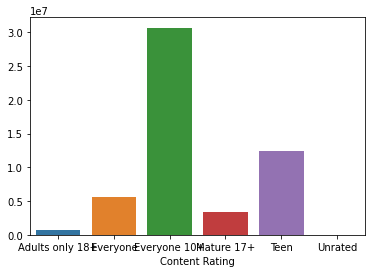

In [135]:
data = googleplay.groupby(['Content Rating'])['Installs'].mean()
sns.barplot(data.index,data.values)

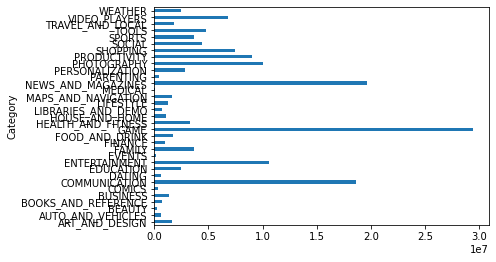

In [174]:
data2 = googleplay.groupby(['Category'])['Installs'].mean()
data2.plot.barh(data2.index,data2.values)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


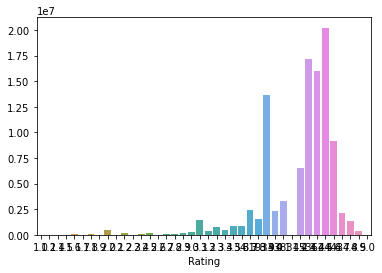

In [137]:
data3 = googleplay.groupby(['Rating'])['Installs'].mean()
sns.barplot(data3.index, data3.values)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


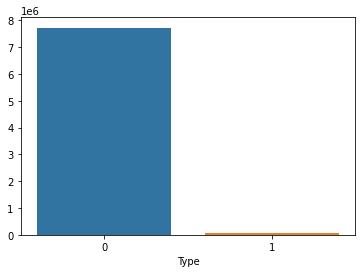

In [138]:
data4 = googleplay.groupby(['Type'])['Installs'].mean()
sns.barplot(data4.index, data4.values)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


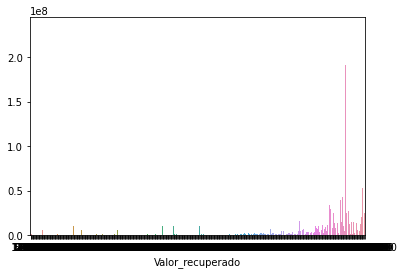

In [139]:
data5 = googleplay.groupby(['Valor_recuperado'])['Installs'].mean()
sns.barplot(data5.index,data5.values)

In [140]:
drop_columns = ['Size', 'valor_num', 'factor_num', 'Genres']
play = googleplay.drop(columns = drop_columns)

In [141]:
play

,Category,Rating,Reviews,Installs,Type,Content Rating,Valor_recuperado
0,ART_AND_DESIGN,4.100000,159.0,10000.0,0,Everyone,19000000.0
1,ART_AND_DESIGN,3.900000,967.0,500000.0,0,Everyone,14000000.0
2,ART_AND_DESIGN,4.700000,87510.0,5000000.0,0,Everyone,8700000.0
3,ART_AND_DESIGN,4.500000,215644.0,50000000.0,0,Teen,25000000.0
4,ART_AND_DESIGN,4.300000,967.0,100000.0,0,Everyone,2800000.0
...,...,...,...,...,...,...,...
10835,BUSINESS,4.193338,0.0,10.0,0,Everyone,9600000.0
10836,FAMILY,4.500000,38.0,5000.0,0,Everyone,53000000.0
10837,FAMILY,5.000000,4.0,100.0,0,Everyone,3600000.0
10838,MEDICAL,4.193338,3.0,1000.0,0,Everyone,9500000.0


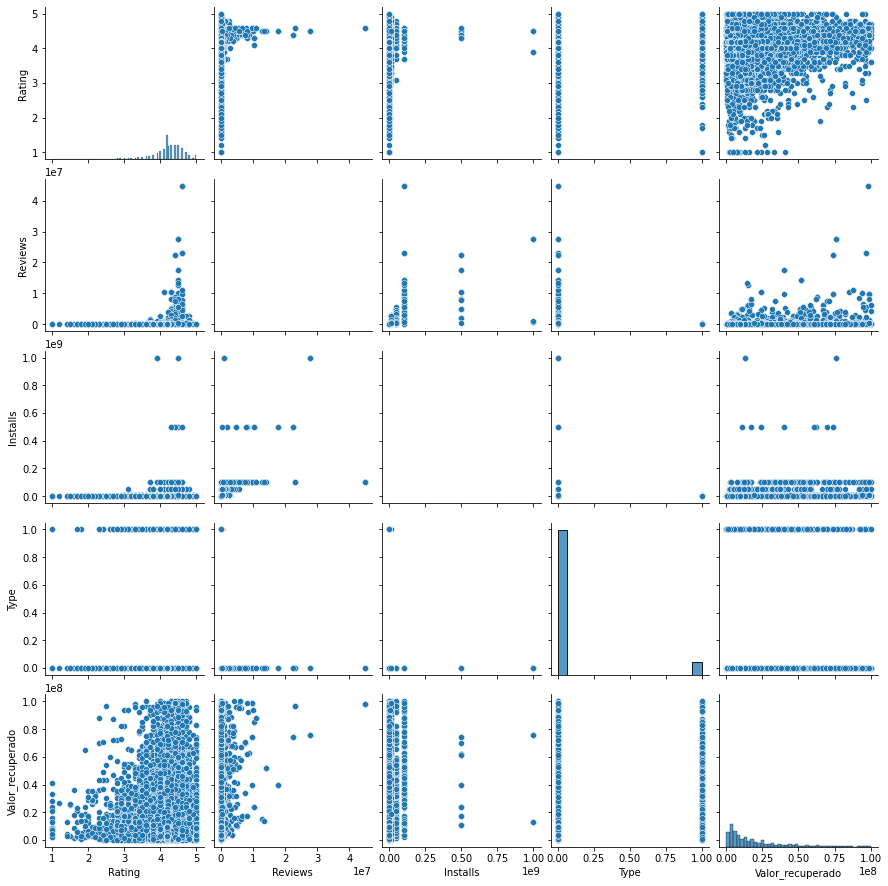

In [142]:
import seaborn as sns

sns.pairplot(play)  #grafica todo con todo

In [143]:
play= pd.get_dummies(play, drop_first = True)
play.head()

,Rating,Reviews,Installs,Type,Valor_recuperado,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159.0,10000.0,0,19000000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967.0,500000.0,0,14000000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510.0,5000000.0,0,8700000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644.0,50000000.0,0,25000000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967.0,100000.0,0,2800000.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**MODELO**

In [144]:
# X , y
X = play.drop(columns='Installs')
y = play['Installs']

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [146]:
model.predict(X_train)

array([   1000.,       0., 1000000., ...,  500000.,  100000.,   10000.])

In [147]:
y_train

9332       1000.0
8614          0.0
3868    1000000.0
7196      10000.0
1615     100000.0
          ...    
8833        100.0
4174      50000.0
5338     500000.0
2960     100000.0
4006      10000.0
Name: Installs, Length: 6858, dtype: float64

In [148]:
from sklearn.metrics import mean_squared_error   #cant de error con y.train y X.train

mean_squared_error(y_train, model.predict(X_train),squared=False)  

12.360721259031239

In [149]:
model.get_depth()

51

In [150]:
mean_squared_error(y_test, model.predict(X_test),squared=False)  #cant de error con y.test y X.test(datos guardados)

12457401.166022032

In [151]:
from sklearn.ensemble import RandomForestRegressor

random = RandomForestRegressor()
random.fit(X_train, y_train)
mean_squared_error(y_train,random.predict(X_train),squared=False)

4097880.624297988

In [152]:
random2 = RandomForestRegressor(n_estimators=300,max_depth=2,max_features=10)
random2.fit(X_train, y_train)
mean_squared_error(y_train,random2.predict(X_train),squared=False)

38872177.39762643

In [153]:
mean_squared_error(y_test,random.predict(X_test),squared=False)

15318904.984784273

In [154]:
mean_squared_error(y_test,random2.predict(X_test),squared=False)

32042253.54115564

**Como se vio no funciono la prediccion y es posible que los datos no sean buenos predictorios por lo cual voy a cambiar mi dato a predecir**
RATING

In [155]:
X2 = play.drop(columns='Rating')
y2 = play['Rating']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=5)
model = DecisionTreeRegressor()
model.fit(X2_train, y2_train)
model.predict(X2_train)

array([3.1       , 4.19333832, 4.2       , ..., 4.5       , 4.3       ,
       1.7       ])

In [156]:
y2_train

9332    3.100000
8614    4.193338
3868    4.200000
7196    4.500000
1615    4.600000
          ...   
8833    4.193338
4174    3.800000
5338    4.500000
2960    4.300000
4006    1.700000
Name: Rating, Length: 6858, dtype: float64

In [157]:
mean_squared_error(y2_train, model.predict(X2_train),squared=False)  #cant de error con y.train y X.train

0.013908766507167844

In [158]:
model.get_depth()

47

In [159]:
mean_squared_error(y2_test, model.predict(X2_test),squared=False) #cant de error con y.test y X.test(datos guardados)

0.6493675995064627

In [160]:
random = RandomForestRegressor(n_estimators=300,max_depth=2,max_features=10)
random.fit(X2_train, y2_train)
mean_squared_error(y2_train,random.predict(X2_train),squared=False)

0.49257656194925714

In [161]:
mean_squared_error(y2_test,random.predict(X2_test),squared=False)

0.4838682595215794

**Como se ve, predice mejor Rating que Installs. Entonces vamos a ir agregando las columnas eliminadas. O buscar otros tipos de prediccion**

In [162]:
#Genres separar los por ;  (probar)
#Size separarlos categoricamente ej: entre 0 a 456k, 457k a 1M, etc
#Last Updated usar las fechas
#'App','Current Ver','Android Ver' no se van a usar porque no aportan algun dato predictorio (luego fijar las versiones)

In [163]:
play.to_csv('play.csv')